In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
dataset_1=pd.read_csv("Vlagun_Crus_Basins.csv")
dataset_2=pd.read_csv("Vlagun_Rotif_Basins.csv")

In [3]:
dataset_1.head()

,Bosmina longirostris,Ceriodaphnia sp.,Diaphanosoma brachyurum,Leptodora kindtii,Acartia longiremis,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Thermocyclops oithonoides,Eurytemora lacustris,Basin
0,0.0,0.0,0.0,0.0,2.0710,0.9298,0.9251,0.0000,0.0025,0.0257,0.0000,0.0,0
1,0.0,0.0,0.0,0.0,0.5014,0.0378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0
2,0.0,0.0,0.0,0.0,0.0931,0.0000,0.0000,0.0093,0.0138,0.0006,0.0091,0.0,0
3,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0129,0.0060,0.0140,0.0155,0.0179,0.0,0
4,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0141,0.0000,0.0093,0.0007,0.0166,0.0,0


In [4]:
dataset_2.head()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0,0.0,0.0,0.0,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0


In [5]:
dataset_1.dropna(inplace=True)
dataset_2.dropna(inplace=True)

In [6]:
X_1=pd.get_dummies(dataset_1)
X_1.drop(['Basin'], inplace=True, axis=1)
Y_1 = dataset_1["Basin"]

In [7]:
X_2=pd.get_dummies(dataset_2)
X_2.drop(['Basin'], inplace=True, axis=1)
Y_2 = dataset_2["Basin"]

In [8]:
X_1=X_1.iloc[:,0:12]
Y_1=Y_1.iloc[:,]
test_size_1 = 0.25
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,Y_1, test_size=test_size_1, random_state=16)

In [9]:
X_2=X_2.iloc[:,0:19]
Y_2=Y_2.iloc[:,]
test_size_2 = 0.25
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,Y_2, test_size=test_size_2, random_state=16)

In [10]:
logreg_1=LogisticRegression(random_state=16)
logreg_2=LogisticRegression(random_state=16)

logreg_1.fit(X_train_1, y_train_1)

y_pred_1=logreg_1.predict(X_test_1)

In [11]:
logreg_2.fit(X_train_2, y_train_2)

y_pred_2=logreg_2.predict(X_test_2)

In [12]:
cnf_matrix_1 = metrics.confusion_matrix(y_test_1, y_pred_1)
cnf_matrix_1

array([[23,  0],
       [10,  6]], dtype=int64)

In [13]:
cnf_matrix_2 = metrics.confusion_matrix(y_test_2, y_pred_2)
cnf_matrix_2

array([[20,  3],
       [15,  1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

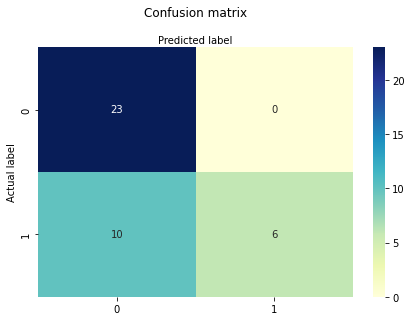

In [14]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Text(0.5, 257.44, 'Predicted label')

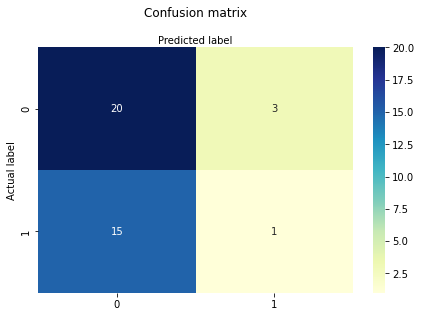

In [15]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_2), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [16]:
target_names=["class 0", "class 1"]
print(classification_report(y_test_1, y_pred_1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      1.00      0.82        23
     class 1       1.00      0.38      0.55        16

    accuracy                           0.74        39
   macro avg       0.85      0.69      0.68        39
weighted avg       0.82      0.74      0.71        39



In [17]:
target_names=["class 0", "class 1"]
print(classification_report(y_test_2, y_pred_2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.87      0.69        23
     class 1       0.25      0.06      0.10        16

    accuracy                           0.54        39
   macro avg       0.41      0.47      0.39        39
weighted avg       0.44      0.54      0.45        39



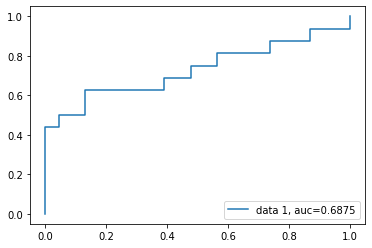

In [20]:
y_pred_proba_1 = logreg_1.predict_proba(X_test_1)[::,1]
fpr_1, tpr_1, _ = metrics.roc_curve(y_test_1, y_pred_proba_1)
auc_1 = metrics.roc_auc_score(y_test_1, y_pred_1)
plt.plot(fpr_1,tpr_1,label="data 1, auc="+str(auc_1))
plt.legend(loc=4)
plt.show()

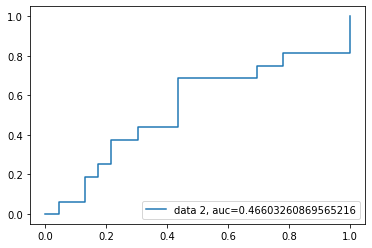

In [21]:
y_pred_proba_2 = logreg_2.predict_proba(X_test_2)[::,1]
fpr_2, tpr_2, _ = metrics.roc_curve(y_test_2, y_pred_proba_2)
auc_2 = metrics.roc_auc_score(y_test_2, y_pred_2)
plt.plot(fpr_2,tpr_2,label="data 2, auc="+str(auc_2))
plt.legend(loc=4)
plt.show()